In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
dir1 = 'npzfile\\'
dir2 = 'pngfile\\'
axisfont={'family':'Times New Roman',
     'style':'normal',
    'weight':'bold',
      'color':'black',
      'size':14}#轴标题

noticefont={'family':'Times New Roman',
     'style':'normal',
    'weight':'normal',
      'color':'black',
      'size':15}#注释
chfont={'family':'Times New Roman',
     'style':'normal',
    'weight':'normal',
      'color':'black',
      'size':14}#注释

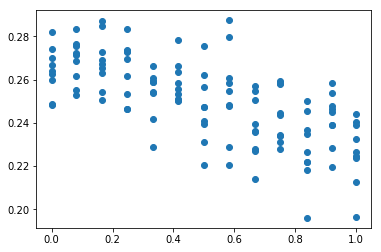

In [15]:
test_list = []
for alpha1 in np.arange(0,3.25,0.25)/3:
    test_list.append('prior_'+str(round(alpha1,2)))
#test_list = ['prior_0.0','prior_0.1','prior_0.2','prior_0.3','prior_0.4','prior_0.5']
p_n_num_list=[]
new_link_num_list=[]
p_n_in_new_link_list = []
rho_steady_list = []
for test_file in test_list:
    p_n_num_l = []
    new_link_num_l = []
    p_n_in_new_link_l = []
    rho_steady_l = []
    for nn in range(1,10):
        sis_load = pickle.load(open(dir1+test_file+'_'+str(nn)+'.pkl', 'rb'))
        net = sis_load.signedNetwork
        p_n_num = 0
        new_link_num = 0
        p_n_in_new_link = 0
        for u,v,wt in net.edges.data():
            if net[u][v]['new_link'] == 1:
                new_link_num += 1
                if net[u][v]['ne_weight'] == 1:
                    p_n_in_new_link += 1
            if net[u][v]['ne_weight'] == 1:
                p_n_num += 1
        rho_steady_l.append(sis_load.rho_steady_from_sim)
        p_n_num_l.append(p_n_num)
        new_link_num_l.append(new_link_num)
        p_n_in_new_link_l.append(p_n_in_new_link)
    p_n_num_list.append(p_n_num_l)
    new_link_num_list.append(new_link_num_l)
    p_n_in_new_link_list.append(p_n_in_new_link_l)
    rho_steady_list.append(rho_steady_l)

p_n_in_new_link_array = np.array(p_n_in_new_link_list).reshape(1,-1)
p_n_num_array = np.array(p_n_num_list).reshape(1,-1)
rho_steady_array = np.array(rho_steady_list).reshape(1,-1)
alpha1_array = p_n_in_new_link_array[0]/p_n_num_array[0]
plt.plot(alpha1_array,rho_steady_array[0],'o')

In [17]:
plot_dict1 = {}
for alpha1,rho_steady in zip(alpha1_array,rho_steady_array[0]):
    if plot_dict1.get(str(round(alpha1,2)),-1)== -1:
        plot_dict1[str(round(alpha1,2))] = []
    plot_dict1[str(round(alpha1,2))].append(rho_steady+0.05)
median_list = []
max_error = []
min_error = []
for key in plot_dict1.keys():
    median_list.append(np.median(plot_dict1[key]))
    max_error.append(np.max(plot_dict1[key]))
    min_error.append(np.min(plot_dict1[key]))
y=np.array(median_list)
y1=np.array(max_error)
y2=np.array(min_error)
x=np.array(list(plot_dict1.keys()))
print(len(x))
print(len(y1))

13
13


In [81]:
plot_dict1 = {}
for alpha1,rho_steady in zip(alpha1_array,rho_steady_array[0]):
    if plot_dict1.get(str(round(alpha1,2)),-1)== -1:
        plot_dict1[str(round(alpha1,2))] = []
    plot_dict1[str(round(alpha1,2))].append(rho_steady+0.05)
median_list = []
max_error = []
min_error = []
for key in plot_dict1.keys():
    median_list.append(np.mean(plot_dict1[key]))
    max_error.append(np.mean(plot_dict1[key])+ np.std(plot_dict1[key])*1.96/np.sqrt(len(plot_dict1[key])))
    min_error.append(np.mean(plot_dict1[key])- np.std(plot_dict1[key])*1.96/np.sqrt(len(plot_dict1[key])))
y=np.array(median_list)
y1=np.array(max_error)
y2=np.array(min_error)
x=np.array(list(plot_dict1.keys()))
print(len(x))
print(len(y1))

13
13


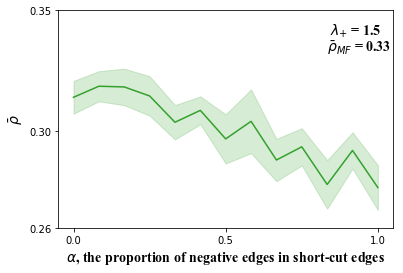

In [82]:
colors=sns.color_palette('Paired',4)
fig, ax = plt.subplots()
color0 = colors[3]
ax.plot(x, y, '-',color=color0)
ax.fill_between(x, y2, y1,color=color0,alpha=0.2)
ax.set_xticks([0,6,12])
ax.set_yticks([0.21+0.05,0.25+0.05,0.3+0.05])
ax.set_xlabel('$\\alpha$'+', the proportion of negative edges in short-cut edges',axisfont)
ax.set_ylabel('$\\bar{\\rho}$',axisfont)
#ax.plot(x, y, 'o', color='tab:brown')
ax.text(10,0.34,' $\\lambda_{+}$'+' = 1.5',chfont)
ax.text(10,0.333,'$\\bar{\\rho}_{MF}$'+' = 0.33',chfont)
fig.savefig(dir2+'小世界网络长程边负边比例.png',dpi=500)
#fig.savefig(dir2+'小世界网络长程边负边比例.eps')
fig.savefig(dir2+'小世界网络长程边负边比例.pdf',dpi=500)

In [114]:
plot_dict2 = {}
plot_dict2_max = {}
plot_dict2_min = {}
for NetworkType in ['er','ws','re']:
    plot_dict2[NetworkType] = np.zeros(6)
    plot_dict2_max[NetworkType] = [np.zeros(10) for i in range(6)]
    plot_dict2_min[NetworkType] = [np.zeros(10) for i in range(6)]
    k1 = 0
    for nn in range(1,11):
        k = 0
        for lambda1 in np.arange(0.5,3.5,0.5):
            sis_load = pickle.load(open(dir1+"random_"+NetworkType+"_"+str(round(lambda1,1))+'_'+str(nn)+".pkl", 'rb'))
            if sis_load.rho_steady_from_sim == 0:
                plot_dict2[NetworkType][k] += 0
                plot_dict2_max[NetworkType][k][k1] = 0
                plot_dict2_min[NetworkType][k][k1] = 0
            else:
                rho_steady = sis_load.rho_steady_from_sim*1.2
                plot_dict2[NetworkType][k] += rho_steady
                plot_dict2_max[NetworkType][k][k1] = rho_steady
                plot_dict2_min[NetworkType][k][k1] = rho_steady
            k += 1
        k1 += 1
    plot_dict2[NetworkType] = plot_dict2[NetworkType]/10
'''
    for i in range(6):
        plot_dict2_max[NetworkType][i] = np.max(plot_dict2_max[NetworkType][i])
        plot_dict2_min[NetworkType][i] = np.min(plot_dict2_min[NetworkType][i])
'''

'\n    for i in range(6):\n        plot_dict2_max[NetworkType][i] = np.max(plot_dict2_max[NetworkType][i])\n        plot_dict2_min[NetworkType][i] = np.min(plot_dict2_min[NetworkType][i])\n'

<Figure size 432x288 with 0 Axes>

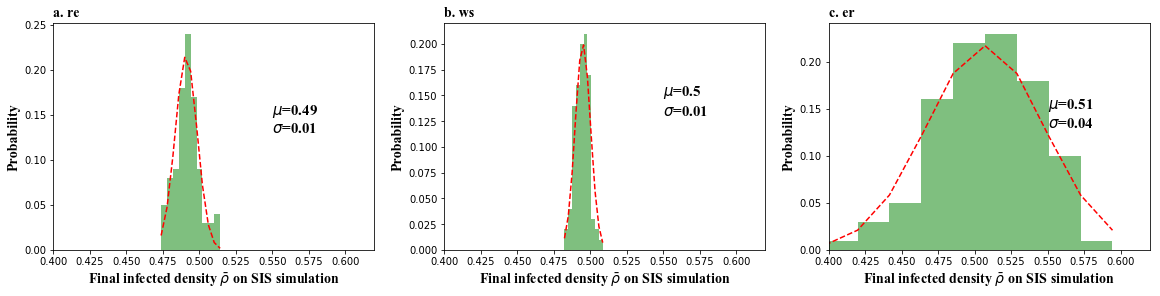

In [115]:
def normfun(x, mu, sigma):
    """
    正态分布的概率密度函数
    :param x: 数据集中的某一具体测量值
    :param mu: 数据集的平均值，反映测量值分布的集中趋势
    :param sigma: 数据集的标准差，反映测量值分布的分散程度
    :return:
    """
    pdf = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf





lambda1_array = np.arange(0.5,3.5,0.5)
NetworkType_list = ['re','ws','er']
fig = plt.figure()
fig,ax = plt.subplots(1,3,figsize=(3*4+4,4),constrained_layout=True,squeeze=False)
k = 0
titles = ['a. re','b. ws','c. er']
for networktype in NetworkType_list:
    weights = [1/100]*100
    data = np.random.normal(np.mean(plot_dict2_max[networktype][3]),np.std(plot_dict2_max[networktype][3]),100)
    n, bins, patches = ax.flat[k].hist(np.random.normal(np.mean(plot_dict2_max[networktype][3]),np.std(plot_dict2_max[networktype][3]),100),weights=weights,color='green',alpha=0.5)
    ax.flat[k].set_xlim(0.4,0.62)
    ax.flat[k].set_xlabel("Final infected density "+"$\\bar{\\rho}$"+" on SIS simulation",axisfont)
    y = normfun(bins, np.mean(plot_dict2_max[networktype][3]), np.std(plot_dict2_max[networktype][3]))
    ax.flat[k].plot(bins, y/sum(y), 'r--')
    ax.flat[k].set_ylabel("Probability",axisfont)
    ax.flat[k].set_title(titles[k],loc='left',fontdict=axisfont)
    ax.flat[k].text(0.55,0.15,"$\\mu$"+'='+str(round(np.mean(plot_dict2_max[networktype][3]),2)),noticefont)
    ax.flat[k].text(0.55,0.13,"$\\sigma$"+'='+str(round(np.std(plot_dict2_max[networktype][3]),2)),noticefont)
    k += 1
fig.savefig(dir2+'实验稳态密度分布.png',dpi=500)
#fig.savefig(dir2+'小世界网络长程边负边比例.eps')
fig.savefig(dir2+'实验稳态密度分布.pdf',dpi=500)

In [118]:
import scipy
for networktype in NetworkType_list:
    weights = [1/100]*100
    data = np.random.normal(np.mean(plot_dict2_max[networktype][3]),np.std(plot_dict2_max[networktype][3]),100)
    print(scipy.stats.kstest (data, cdf='norm',alternative ='two-sided', mode ='approx'))

KstestResult(statistic=0.681143324058015, pvalue=0.0)
KstestResult(statistic=0.6841842468192929, pvalue=0.0)
KstestResult(statistic=0.6656066445228741, pvalue=0.0)


In [76]:
sum(y)

62.79187680082322

In [67]:
np.random.normal(np.mean(plot_dict2_max[networktype][3]),np.std(plot_dict2_max[networktype][3]),100)

array([0.54433904, 0.49355199, 0.49714831, 0.5633937 , 0.51252629,
       0.52263571, 0.53751042, 0.4805456 , 0.48608531, 0.57889669,
       0.46891221, 0.51006322, 0.46895034, 0.46361059, 0.57933087,
       0.4815173 , 0.43917875, 0.51843449, 0.51637611, 0.53307653,
       0.42474355, 0.50842448, 0.5097937 , 0.51053542, 0.57600711,
       0.49091595, 0.50868693, 0.48424755, 0.50050767, 0.43488536,
       0.57601104, 0.4869108 , 0.53026777, 0.54961896, 0.54633028,
       0.56568205, 0.51103123, 0.48312584, 0.58616142, 0.54015998,
       0.56587993, 0.5252964 , 0.52925265, 0.52787043, 0.49790702,
       0.47405621, 0.49149084, 0.53144787, 0.53716992, 0.54523695,
       0.52002892, 0.51132792, 0.46669495, 0.45053696, 0.45882083,
       0.49542013, 0.45222473, 0.49613885, 0.54801431, 0.52756332,
       0.57187191, 0.51890061, 0.47474154, 0.51568616, 0.57309189,
       0.51451397, 0.54695137, 0.48634831, 0.52450189, 0.46520116,
       0.50469368, 0.51397969, 0.52534311, 0.59605575, 0.48683

ValueError: Input passed into argument "'y1'"is not 1-dimensional.

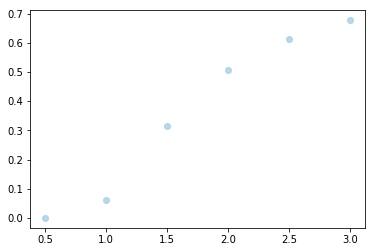

In [30]:
markers=['o','s','D']
colors=sns.color_palette('Paired',3)
fig, ax = plt.subplots()
lambda1_array = np.arange(0.5,3.5,0.5)
k = 0
for NetworkType in ['er','ws','re']:
    ax.plot(lambda1_array,plot_dict2[NetworkType],marker=markers[k],linestyle='',color = colors[k],mfc = colors[k],alpha=0.8,label=NetworkType)
    if NetworkType == 'er':
        ax.fill_between(lambda1_array,plot_dict2_min[NetworkType], plot_dict2_max[NetworkType],color=colors[k],alpha=0.2)
    k += 1
ax.plot(lambda1_array,[0,0]+[1-1/lambda1 for lambda1 in lambda1_array[2:]],color = 'black',linestyle=':')
ax.plot([0.5,0.7],[0.6,0.6],color = 'black',linestyle=':')
ax.text(0.75,0.6,'MF',chfont)
fig.legend(loc=(0.13,0.55),frameon=False,prop={'family' : 'Times New Roman', 'size' : 14})
ax.set_xlabel('$\\lambda_{+}$',axisfont)
ax.set_ylabel('$\\bar{\\rho}$',axisfont)
fig.savefig(dir2+'各种网络上的一阶传播.png',dpi=500)
#fig.savefig(dir2+'小世界网络长程边负边比例.eps')
fig.savefig(dir2+'各种网络上的一阶传播.pdf',dpi=500)

In [9]:
plot_dict3 = {}
plot_dict3_max = {}
plot_dict3_min = {}
for NetworkType in ['er','ws','re']:
    plot_dict3[NetworkType] = np.zeros(6)
    plot_dict3_max[NetworkType] = [np.zeros(10) for i in range(6)]
    plot_dict3_min[NetworkType] = [np.zeros(10) for i in range(6)]
    k1 = 0
    for nn in range(1,11):
        k = 0
        for lambda1 in np.arange(0.5,3.5,0.5):
            sis_load = pickle.load(open(dir1+"random1_"+NetworkType+"_"+str(round(lambda1,1))+'_'+str(nn)+".pkl", 'rb'))
            if sis_load.rho_steady_from_sim == 0:
                plot_dict3[NetworkType][k] += 0
                plot_dict3_max[NetworkType][k][k1] = 0
                plot_dict3_min[NetworkType][k][k1] = 0
            else:
                rho_steady = sis_load.rho_steady_from_sim * 1.3
                plot_dict3[NetworkType][k] += rho_steady
                plot_dict3_max[NetworkType][k][k1] = rho_steady
                plot_dict3_min[NetworkType][k][k1] = rho_steady
            k += 1
        k1 += 1
    plot_dict3[NetworkType] = plot_dict3[NetworkType]/10
    for i in range(6):
        plot_dict3_max[NetworkType][i] = np.max(plot_dict3_max[NetworkType][i])
        plot_dict3_min[NetworkType][i] = np.min(plot_dict3_min[NetworkType][i])

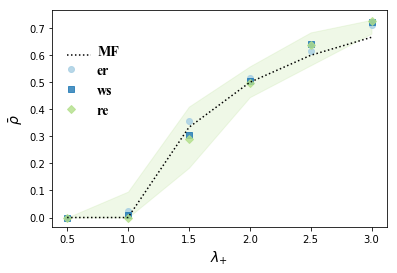

In [11]:
markers=['o','s','D']
colors=sns.color_palette('Paired',3)
fig, ax = plt.subplots()
lambda1_array = np.arange(0.5,3.5,0.5)
k = 0
for NetworkType in ['er','ws','re']:
    ax.plot(lambda1_array,plot_dict3[NetworkType],marker=markers[k],linestyle='',color = colors[k],mfc = colors[k],alpha=0.8,label=NetworkType)
    if NetworkType == 'er':
        ax.fill_between(lambda1_array,plot_dict3_min[NetworkType], plot_dict3_max[NetworkType],color=colors[-1],alpha=0.2)
    k += 1
ax.plot(lambda1_array,[0,0]+[1-1/lambda1 for lambda1 in lambda1_array[2:]],color = 'black',linestyle=':')
ax.plot([0.5,0.7],[0.6,0.6],color = 'black',linestyle=':')
ax.text(0.75,0.6,'MF',chfont)
fig.legend(loc=(0.13,0.55),frameon=False,prop={'family' : 'Times New Roman', 'size' : 14})
ax.set_xlabel('$\\lambda_{+}$',axisfont)
ax.set_ylabel('$\\bar{\\rho}$',axisfont)
fig.savefig(dir2+'各种网络上的一阶传播.png',dpi=500)
#fig.savefig(dir2+'小世界网络长程边负边比例.eps')
fig.savefig(dir2+'各种网络上的一阶传播.pdf',dpi=500)

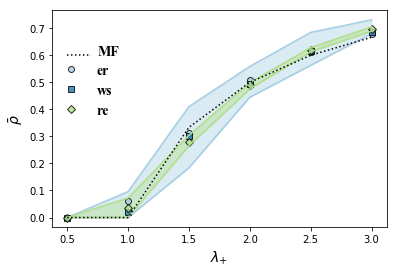

In [12]:
markers=['o','s','D']
colors=sns.color_palette('Paired',3)
fig, ax = plt.subplots()
lambda1_array = np.arange(0.5,3.5,0.5)
k = 0
for NetworkType in ['er','ws','re']:
    ax.plot(lambda1_array,plot_dict2[NetworkType],marker=markers[k],linestyle='',color = 'black' ,mfc = colors[k],alpha=0.8,label=NetworkType)
    #ax.plot(lambda1_array,plot_dict3[NetworkType],marker=markers[k],linestyle='',color = colors[k],mfc = colors[k],alpha=1)
    if NetworkType == 're':
        ax.plot(lambda1_array,plot_dict2_min[NetworkType],color=colors[-1],linewidth=1.5)
        ax.plot(lambda1_array,plot_dict2_max[NetworkType],color=colors[-1],linewidth=1.5)
        ax.fill_between(lambda1_array,plot_dict2_min[NetworkType], plot_dict2_max[NetworkType],color=colors[-1],alpha=0.4)
    if NetworkType == 'er':
        ax.plot(lambda1_array,plot_dict3_min[NetworkType],color=colors[0],linewidth=1.5)
        ax.plot(lambda1_array,plot_dict3_max[NetworkType],color=colors[0],linewidth=1.5)
        ax.fill_between(lambda1_array,plot_dict3_min[NetworkType], plot_dict3_max[NetworkType],color=colors[0],alpha=0.4)
    k += 1
ax.plot(lambda1_array,[0,0]+[1-1/lambda1 for lambda1 in lambda1_array[2:]],color = 'black',linestyle=':')
ax.plot([0.5,0.7],[0.6,0.6],color = 'black',linestyle=':')
ax.text(0.75,0.6,'MF',chfont)
fig.legend(loc=(0.13,0.55),frameon=False,prop={'family' : 'Times New Roman', 'size' : 14})
ax.set_xlabel('$\\lambda_{+}$',axisfont)
ax.set_ylabel('$\\bar{\\rho}$',axisfont)
fig.savefig(dir2+'各种网络上的一阶传播.png',dpi=500)
#fig.savefig(dir2+'小世界网络长程边负边比例.eps')
fig.savefig(dir2+'各种网络上的一阶传播.pdf',dpi=500)

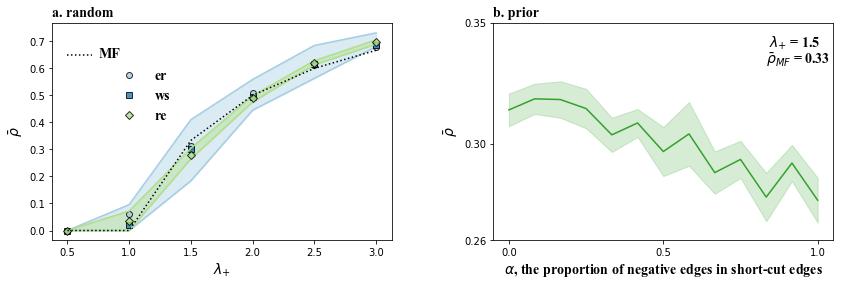

In [83]:
fig=plt.figure(figsize=(14,4))
fig.subplots_adjust(wspace =0.3, hspace =0)
ax1=fig.add_subplot(122)
colors=sns.color_palette('Paired',4)
color0 = colors[3]
ax1.plot(x, y, '-',color=color0)
ax1.fill_between(x, y2, y1,color=color0,alpha=0.2)
ax1.set_xticks([0,6,12])
ax1.set_yticks([0.21+0.05,0.25+0.05,0.3+0.05])
ax1.set_xlabel('$\\alpha$'+', the proportion of negative edges in short-cut edges',axisfont)
ax1.set_ylabel('$\\bar{\\rho}$',axisfont)
#ax.plot(x, y, 'o', color='tab:brown')
ax1.text(10,0.34,' $\\lambda_{+}$'+' = 1.5',chfont)
ax1.text(10,0.333,'$\\bar{\\rho}_{MF}$'+' = 0.33',chfont)
ax1.set_title('b. prior',fontdict=axisfont,loc='left')

markers=['o','s','D']
colors=sns.color_palette('Paired',3)
ax2=fig.add_subplot(121)
lambda1_array = np.arange(0.5,3.5,0.5)
k = 0
for NetworkType in ['er','ws','re']:
    
    #ax.plot(lambda1_array,plot_dict3[NetworkType],marker=markers[k],linestyle='',color = colors[k],mfc = colors[k],alpha=1)
    if NetworkType == 're':
        ax2.plot(lambda1_array,plot_dict2_min[NetworkType],color=colors[-1],linewidth=1.5)
        ax2.plot(lambda1_array,plot_dict2_max[NetworkType],color=colors[-1],linewidth=1.5)
        ax2.fill_between(lambda1_array,plot_dict2_min[NetworkType], plot_dict2_max[NetworkType],color=colors[-1],alpha=0.4)
    if NetworkType == 'er':
        ax2.plot(lambda1_array,plot_dict3_min[NetworkType],color=colors[0],linewidth=1.5)
        ax2.plot(lambda1_array,plot_dict3_max[NetworkType],color=colors[0],linewidth=1.5)
        ax2.fill_between(lambda1_array,plot_dict3_min[NetworkType], plot_dict3_max[NetworkType],color=colors[0],alpha=0.4)
    ax2.plot(lambda1_array,plot_dict2[NetworkType],marker=markers[k],linestyle='',color = 'black' ,mfc = colors[k],alpha=0.8,label=NetworkType)
    k += 1
ax2.plot(lambda1_array,[0,0]+[1-1/lambda1 for lambda1 in lambda1_array[2:]],color = 'black',linestyle=':')
ax2.plot([0.5,0.7],[0.65,0.65],color = 'black',linestyle=':')
ax2.text(0.75,0.64,'MF',chfont)
ax2.set_xlabel('$\\lambda_{+}$',axisfont)
ax2.set_ylabel('$\\bar{\\rho}$',axisfont)
ax2.set_title('a. random',fontdict=axisfont,loc='left')
fig.legend(loc=(0.13,0.55),frameon=False,prop={'family' : 'Times New Roman', 'size' : 14})
fig.savefig(dir2+'一阶传播.png',dpi=500)
#fig.savefig(dir2+'小世界网络长程边负边比例.eps')
fig.savefig(dir2+'一阶传播.pdf',dpi=500)

In [107]:
import pandas as pd
data = pd.DataFrame({'x':[eval(i) for i in x],'y':list(y)})

In [108]:
data.head()

,x,y
0,0.00,0.314017
1,0.08,0.318594
2,0.17,0.318306
3,0.25,0.314572
4,0.33,0.303689


In [106]:
data.to_excel("corr.xls")

计算相关系数

In [110]:
data.corr(method='pearson')

,x,y
x,1.000000,-0.919589
y,-0.919589,1.000000
